In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam


In [ ]:
# Load the VGG16 model but exclude the final fully-connected layers
base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

In [ ]:
# Add a logistic layer with the number of classes you have
num_classes = 10  # replace with your actual number of classes
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Construct the full model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the paths for the train, validation, and test directories
train_dir ="/content/drive/MyDrive/Intern/dataset/train"
validation_dir ="/content/drive/MyDrive/Intern/train"
test_dir ="/content/drive/MyDrive/Intern/train"


In [ ]:
# Define your data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 30 images belonging to 10 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 20 images belonging to 10 classes.


In [ ]:
# Calculate the steps per epoch
train_steps_per_epoch = np.ceil(train_generator.samples / train_generator.batch_size)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=55,  # replace with your desired number of epochs
    validation_data=validation_generator,
    validation_steps=validation_steps)


Epoch 1/55
1/1 [==============================] - 18s 18s/step - loss: 2.3209 - accuracy: 0.1667 - val_loss: 2.3144 - val_accuracy: 0.1000
Epoch 2/55
1/1 [==============================] - 2s 2s/step - loss: 2.2809 - accuracy: 0.2667 - val_loss: 2.2898 - val_accuracy: 0.1000
Epoch 3/55
1/1 [==============================] - 3s 3s/step - loss: 2.2590 - accuracy: 0.2000 - val_loss: 2.2662 - val_accuracy: 0.1500
Epoch 4/55
1/1 [==============================] - 3s 3s/step - loss: 2.2479 - accuracy: 0.2667 - val_loss: 2.2441 - val_accuracy: 0.1500
Epoch 5/55
1/1 [==============================] - 3s 3s/step - loss: 2.2176 - accuracy: 0.3667 - val_loss: 2.2236 - val_accuracy: 0.1500
Epoch 6/55
1/1 [==============================] - 2s 2s/step - loss: 2.2006 - accuracy: 0.4000 - val_loss: 2.2044 - val_accuracy: 0.2500
Epoch 7/55
1/1 [==============================] - 2s 2s/step - loss: 2.1739 - accuracy: 0.3667 - val_loss: 2.1860 - val_accuracy: 0.2500
Epoch 8/55
1/1 [=======================

In [ ]:
# Save the model
model.save('VGG16_PCB_Defect_Detection_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model - Keras
model.save('VGG16_PCB_Defect_Detection_Model.keras')

In [ ]:
# Update the model's output layer to match the number of classes in your dataset
# Assuming you have 10 classes, replace 10 with the actual number of classes
num_classes = 10
model_output = Dense(num_classes, activation='softmax')(x)

# Recompile the model with the updated output layer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
def plot_training_history(history, EPOCHS):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), acc, label='Training Accuracy')
    plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(EPOCHS), loss, label='Training Loss')
    plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

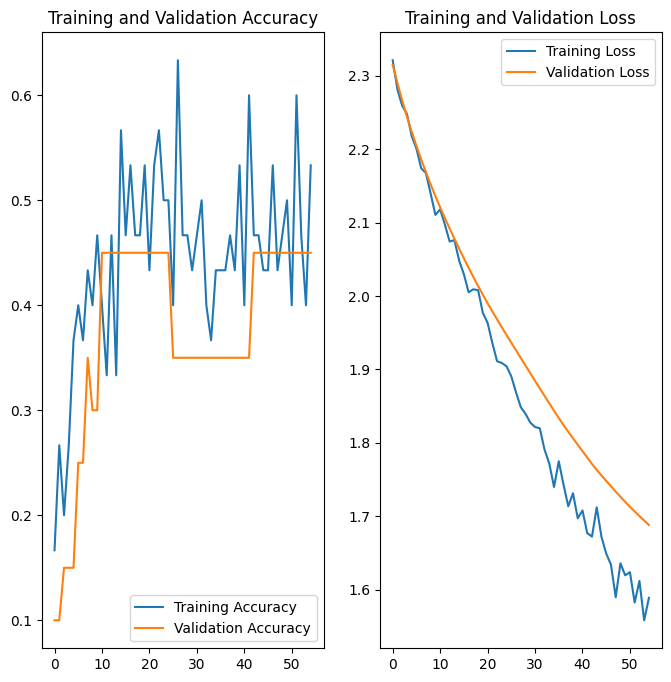

In [ ]:
# Plot training and validation accuracy and loss
plot_training_history(history, 55)

In [ ]:
# Function to predict the class of an image
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
# Function to run prediction on a sample image and display the result
def run_prediction_on_sample(model, test_ds, class_names):
    for images_batch, labels_batch in test_ds.take(1):
        first_image = images_batch[0].numpy().astype('uint8')

        print("First image to predict")
        plt.imshow(first_image)

        predicted_class, confidence = predict(model, first_image, class_names)
        print("Predicted label:", predicted_class)

In [ ]:
# Function to run inference on few sample images and display the results
def run_inference_on_samples(model, test_ds, class_names):
    plt.figure(figsize=(15, 15))
    for images, labels in test_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            actual_class=class_names[labels[i]]
            predicted_class, confidence = predict(model, images[i].numpy(), class_names)
            plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%.\n Actual:{actual_class}")
            plt.axis("off")


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  batch_size=32,
  image_size=(150, 150))

Found 30 files belonging to 10 classes.


In [ ]:
class_names=train_ds.class_names
class_names

['Burnt',
 'Casing_body_defect',
 'Good_condition',
 'Missing_hole',
 'Missing_parts',
 'Mouse_bite',
 'Open_circuit',
 'Short',
 'Spur',
 'Spurious_copper']

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  batch_size=32,
  image_size=(150, 150))

Found 20 files belonging to 10 classes.


First image to predict
1/1 [==============================] - 1s 1s/step
Predicted label: Burnt


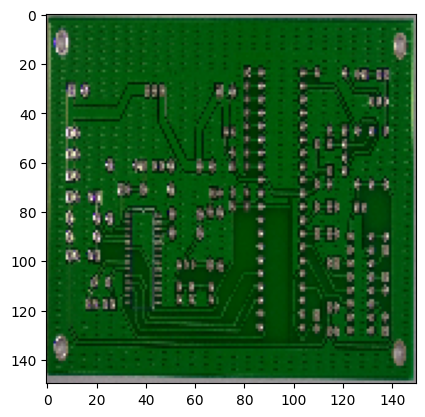

In [ ]:
# Run prediction on a sample
run_prediction_on_sample(model, test_ds, class_names)

1/1 [==============================] - 0s 17ms/step


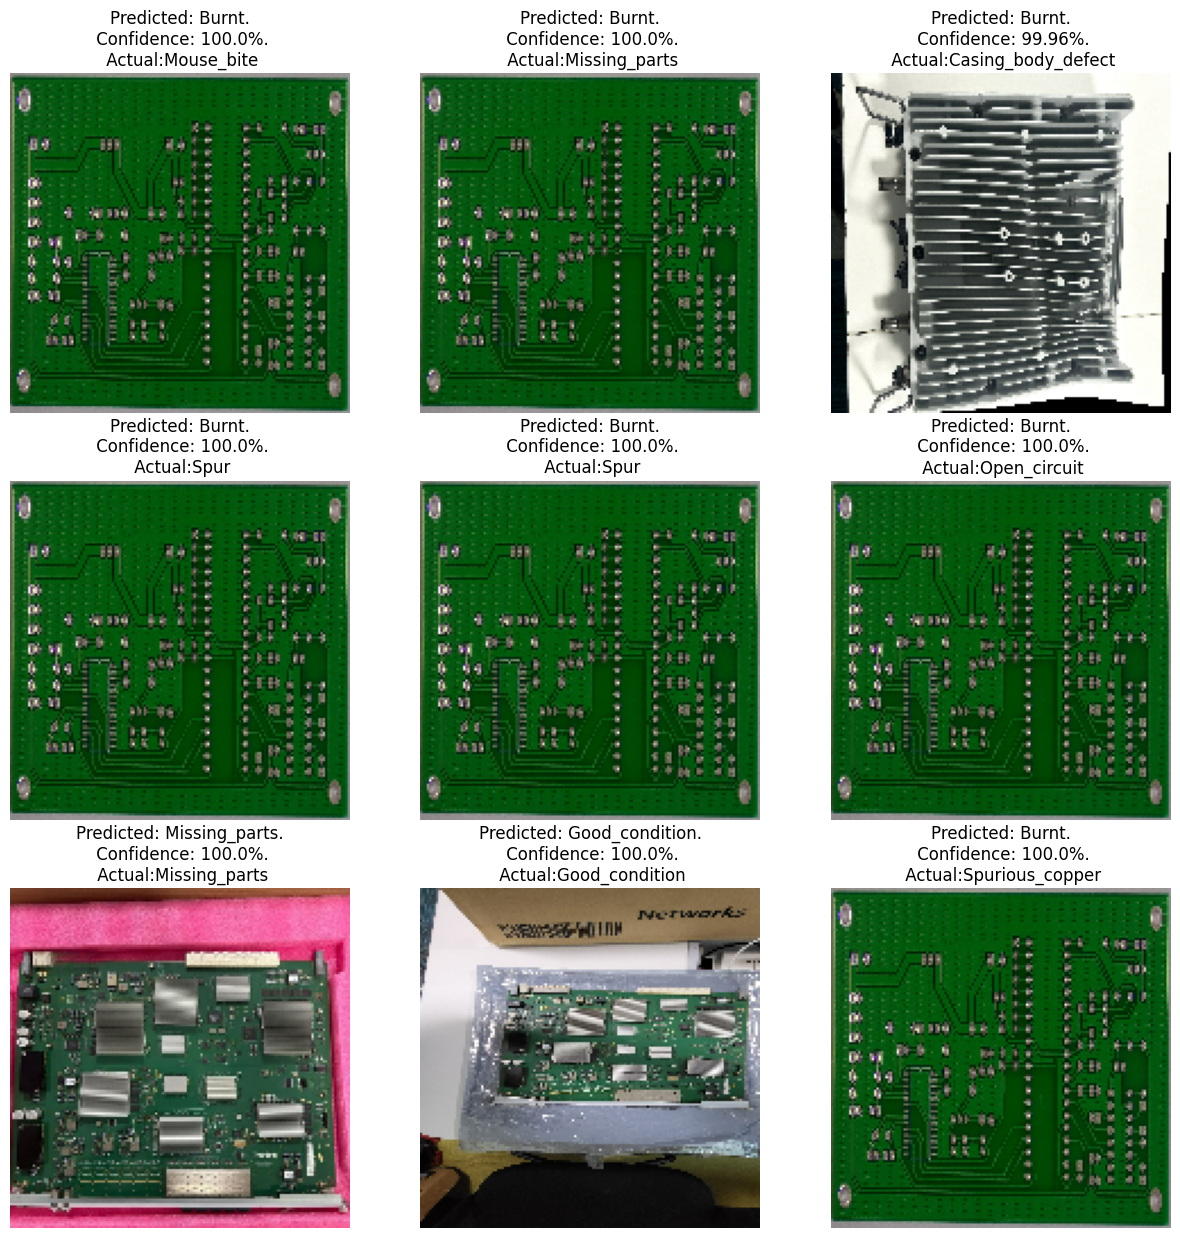

In [ ]:
# Run inference on samples
run_inference_on_samples(model, test_ds, class_names)

In [ ]:
# Load the dataset
# dataset = tf.data.Dataset.from_tensor_slices((train_ds, train_labels))


In [ ]:
# Plot training and validation accuracy and loss
def plot_training_history(history, EPOCHS):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), acc, label='Training Accuracy')
    plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(EPOCHS), loss, label='Training Loss')
    plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history, 5)

In [ ]:
# Function to predict the class of an image
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
# Function to run prediction on a sample image and display the result
def run_prediction_on_sample(model, test_datagen, test_dir, class_names):
    test_ds = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode=None,
        shuffle=False)

    for images_batch, labels_batch in test_ds.take(1):
        first_image = images_batch[0].numpy().astype('uint8')

In [ ]:
# Model summary
model.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_data_dir = r'D:\TANSAM AI Projects\PCB Defect Detection\data1\train'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_data_dir = r'D:\TANSAM AI Projects\PCB Defect Detection\data1\validation'

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Plotting the first few images
class_names = train_generator.class_indices
class_names = {i: k for k, i in class_names.items()}

plt.figure(figsize=(10, 10))
for i, (image_batch, labels_batch) in enumerate(train_generator):
    if i == 1:
        break
    for j in range(12):
        ax = plt.subplot(3, 4, j + 1)
        image = image_batch[j]
        image = np.clip(image * 255, 0, 255).astype(np.uint8)  # Rescale the image back to [0, 255] range
        plt.imshow(image)
        plt.title(class_names[np.argmax(labels_batch[j])])
        plt.axis("off")
plt.show()

In [ ]:
def train_generator_fn():
    for images, labels in train_generator:
        yield (images, labels)

train_ds = tf.data.Dataset.from_generator(
    train_generator_fn,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),
    ),
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

def validation_generator_fn():
    for images, labels in validation_generator:
        yield (images, labels)

val_ds = tf.data.Dataset.from_generator(
    validation_generator_fn,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32),
    ),
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

def test_datagen_fn():
    for images in test_datagen:
        yield (images,)

test_ds = tf.data.Dataset.from_generator(
    test_datagen_fn,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
    ),
    args=(validation_data_dir,),
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Preprocessing layers
IMAGE_SIZE = (150, 150)
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
def test_datagen_fn(test_data_dir):
    test_ds = tf.data.Dataset.list_files(test_data_dir + '/*/*')
    test_ds = test_ds.map(lambda x: tf.io.read_file(x))
    test_ds = test_ds.map(lambda x: tf.image.decode_jpeg(x, channels=3))
    test_ds = test_ds.map(lambda x: tf.image.resize(x, [150, 150]))
    test_ds = test_ds.map(lambda x: x / 255.0)
    return test_ds

test_ds = tf.data.Dataset.from_generator(
    test_datagen_fn,
    output_signature=(
        tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
    ),
    args=(validation_data_dir,),
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Function to predict the class of an image
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
# Function to run prediction on a sample image and display the result
def run_prediction_on_sample(model, test_ds, class_names):
    for images_batch, labels_batch in test_ds.take(1):
        first_image = images_batch[0].numpy().astype('uint8')
        first_label = labels_batch[0].numpy()

        print("First image to predict")
        plt.imshow(first_image)
        print("Actual label:", class_names[first_label])

        batch_prediction = model.predict(images_batch)
        print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [ ]:
# Function to run inference on few sample images and display the results
def run_inference_on_samples(model, test_ds, class_names):
    plt.figure(figsize=(15, 15))
    for images, labels in test_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            predicted_class, confidence = predict(model, images[i].numpy(), class_names)
            actual_class = class_names[labels[i]]

            plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
            plt.axis("off")